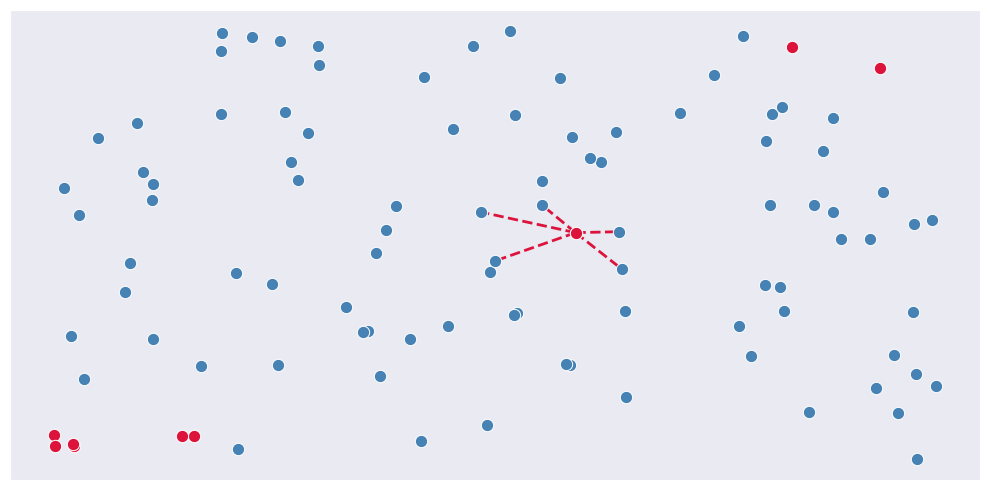

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import seaborn as sns

sns.set_style('dark')

plt.figure(figsize=(10, 5))
# Gerar dados aleatórios
np.random.seed(5)
x = np.random.rand(100)
y = np.random.rand(100)

# Selecionar um ponto aleatório
selected_point_index = np.random.randint(0, 100)
selected_point = np.array([x[selected_point_index], y[selected_point_index]])

# Calcular distâncias do ponto selecionado para todos os outros pontos
points = np.column_stack((x, y))
distances = distance.cdist([selected_point], points, 'euclidean')[0]

# Encontrar os 5 vizinhos mais próximos (excluindo o próprio ponto selecionado)
nearest_neighbors_indices = np.argsort(distances)[1:6]

# Definir pontos de referência e distância limite
reference_points = np.array([[0, 0], [1, 1]])
distance_limit = 0.2

# Calcular distâncias dos pontos de referência para todos os outros pontos
distances_to_ref = distance.cdist(reference_points, points, 'euclidean')

# Encontrar índices dos pontos próximos aos pontos de referência
near_ref_indices = np.unique(np.where(distances_to_ref < distance_limit)[1])

# Adicionar linhas pontilhadas entre o ponto selecionado e seus vizinhos mais próximos
for neighbor_index in nearest_neighbors_indices:
    plt.plot([selected_point[0], x[neighbor_index]], [selected_point[1], y[neighbor_index]], '--', color = 'crimson', linewidth = 2)

# Criar a nuvem de pontos usando Seaborn
sns.scatterplot(x=x, y=y, color='steelblue', s=79, zorder=3)
sns.scatterplot(x=[selected_point[0]], y=[selected_point[1]], color='crimson', s=79, zorder=3)
sns.scatterplot(x=x[nearest_neighbors_indices], y=y[nearest_neighbors_indices], color='steelblue', s=49, zorder=2)

# Pintar os pontos mais próximos de (0,0) e (1,1) de crimson
sns.scatterplot(x=x[near_ref_indices], y=y[near_ref_indices], color='crimson', marker = 'o', s=79, zorder=3)

# Adicionar título e rótulos
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()
